In [43]:
%autosave 10

# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [44]:
# Import the dataset
df1 = pd.read_csv(r"C:/Users/Hemant/Desktop/cleaned_data.csv")
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [45]:
# Test-Train Split

# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df1['LIMIT_BAL'].values.reshape(-1,1)

# Putting response variable to y
y = df1['default payment next month'].values.reshape(-1,1)

In [46]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331, 1)
(5333, 1)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [47]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

model= example_lr.fit(X_train, y_train)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [48]:
# Prediction on the test data
pred_test = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [49]:
# sum of predicted probabilities
prob_sum = np.sum(pred_test,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4178
           1       0.00      0.00      0.00      1155

    accuracy                           0.78      5333
   macro avg       0.39      0.50      0.44      5333
weighted avg       0.61      0.78      0.69      5333



In [51]:
# Converting y_pred to a dataframe as its an array
y_pred_df = pd.DataFrame(pred_test)
y_test=pd.DataFrame(y_test)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test, y_pred_1],axis=1)

# Column renaming
y_pred_final= y_pred_final.rename(columns={ 0 : 'default', 1 : 'default_predicted' })
y_pred_final.head()

,default,default_predicted
0,0,0.251731
1,0,0.415703
2,0,0.203955
3,1,0.203955
4,0,0.415703


In [52]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.default,y_pred_final.default_predicted)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.6201990844642832


_________________________________________________________________________
**Now, plot the ROC curve.**


In [53]:
# ROC Curve
from sklearn import metrics

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

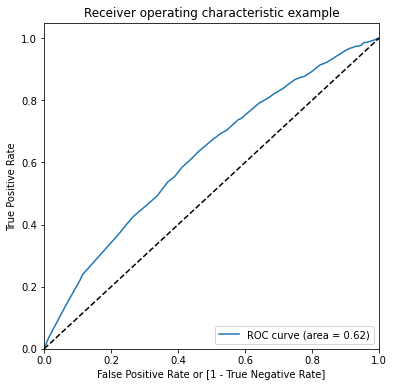

(array([0.        , 0.01244615, 0.06390618, 0.10818573, 0.11393011,
        0.2209191 , 0.24629009, 0.2663954 , 0.32048827, 0.3382001 ,
        0.36955481, 0.38942078, 0.41168023, 0.43752992, 0.46146482,
        0.50335089, 0.52752513, 0.5454763 , 0.57946386, 0.58784107,
        0.64121589, 0.66850168, 0.68597415, 0.71325993, 0.73719483,
        0.74892293, 0.7673528 , 0.77692676, 0.79104835, 0.8025371 ,
        0.82431786, 0.83389181, 0.84657731, 0.85495452, 0.86213499,
        0.87170895, 0.90234562, 0.90641455, 0.91191958, 0.92053614,
        0.9305888 , 0.93322164, 0.93992341, 0.94375299, 0.94614648,
        0.95213021, 0.95595979, 0.95931067, 0.96242221, 0.96553375,
        0.99258018, 0.99305888, 0.99377693, 0.99377693, 0.99401628,
        0.99473432, 0.99497367, 0.99521302, 0.99593107, 0.99688846,
        0.99736716, 0.99832456, 0.99856391, 0.99880326, 0.9995213 ,
        0.99976065, 1.        ]),
 array([0.        , 0.03376623, 0.13852814, 0.22337662, 0.23809524,
        0.3670

In [54]:
draw_roc(y_pred_final.default,y_pred_final.default_predicted)

In [55]:
# Finidng the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold= Find_Optimal_Cutoff(y_pred_final.default, y_pred_final.default_predicted)
print('Threshold: ',threshold)

Threshold:  [0.30638978296021585]


In [56]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.30 else 0
y_pred_final['pred_default'] = y_pred_final.default_predicted.map( lambda x: 1 if x > 0.30 else 0)

y_pred_final.default.value_counts()

0    4178
1    1155
Name: default, dtype: int64

In [57]:
# Now again check the Accuracy
print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred))

Accuracy Score on test data:  0.7834239639977498


_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [58]:
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics

# Precision
precision_score(y_pred_final.default, y_pred_final.pred_default)

0.2818371607515658

In [59]:
# Recall
recall_score(y_pred_final.default, y_pred_final.pred_default)

0.5844155844155844

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


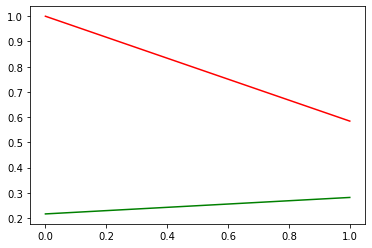

In [60]:
from sklearn.metrics import precision_recall_curve,auc

p, r, thresholds = precision_recall_curve(y_pred_final.default, y_pred_final.pred_default)


# precision and recall trade off plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [61]:
auc(r, p)

0.47812918525936726

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [62]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.default,y_pred_final.default_predicted)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.6201990844642832
